In [184]:
import flow_from_directory as ffd

import os

import pandas as pd
from PIL import Image
from pathlib import Path
import xml.etree.ElementTree as ET
from typing import Generator, Iterator, Tuple
import numpy as np

DATA_DIR = Path("data")


In [149]:
# Cargar y analizar el archivo XML
tree = ET.parse('data/annotations/annotations_00.xml')
root = tree.getroot()

# Obtener todas las anotaciones
annotations = root.findall('image')
type(annotations[0])

xml.etree.ElementTree.Element

In [150]:
os.listdir(DATA_DIR / "dataset_train")[0]

'IMG_5619(1)_026.jpg'

In [151]:




# Crear un diccionario para almacenar las anotaciones por nombre de imagen
annotations_dict = {}

# Iterar sobre las anotaciones y extraer los datos
for image in annotations:
    image_name = image.get('name')
    skeletons = []
    for skeleton in image.findall('skeleton'):
        keypoints = []
        for point in skeleton.findall('points'):
            x = point.get('points').split(',')[0]
            y = point.get('points').split(',')[1]
            keypoints.append((x, y))
        skeletons.append(keypoints)
    annotations_dict[image_name] = skeletons

# Imprimir el diccionario de anotaciones para verificar
for image_name, skeletons in annotations_dict.items():
    print(f"Imagen: {image_name}")
    for i, skeleton in enumerate(skeletons):
        print(f"  Esqueleto: {skeleton}")
        


Imagen: Captura de pantalla 2024-06-10 a las 19.24.333.png
  Esqueleto: [('278.46', '262.19'), ('368.39', '290.25'), ('359.91', '195.75'), ('334.46', '275.48'), ('273.29', '450.46'), ('350.56', '457.83'), ('278.46', '576.70'), ('346.33', '575.22'), ('261.20', '734.68'), ('331.15', '714.79')]
Imagen: IMG_5572(1)_000.jpg
  Esqueleto: [('487.67', '468.76'), ('639.36', '542.01'), ('615.60', '335.39'), ('574.17', '495.08'), ('462.30', '875.66'), ('603.36', '892.89'), ('495.96', '1172.22'), ('618.04', '1160.76'), ('468.94', '1529.43'), ('605.63', '1455.00')]
Imagen: IMG_5572(1)_001.jpg
  Esqueleto: [('476.55', '468.17'), ('649.92', '535.00'), ('616.76', '340.76'), ('585.73', '490.66'), ('440.74', '882.29'), ('578.49', '896.20'), ('499.28', '1175.13'), ('625.09', '1159.94'), ('466.57', '1525.05'), ('605.63', '1454.16')]
Imagen: IMG_5572(1)_002.jpg
  Esqueleto: [('465.43', '467.58'), ('660.49', '527.99'), ('617.92', '345.35'), ('597.30', '486.23'), ('437.43', '885.61'), ('576.83', '897.86'), (

In [152]:
annotations_dict

{'Captura de pantalla 2024-06-10 a las 19.24.333.png': [[('278.46', '262.19'),
   ('368.39', '290.25'),
   ('359.91', '195.75'),
   ('334.46', '275.48'),
   ('273.29', '450.46'),
   ('350.56', '457.83'),
   ('278.46', '576.70'),
   ('346.33', '575.22'),
   ('261.20', '734.68'),
   ('331.15', '714.79')]],
 'IMG_5572(1)_000.jpg': [[('487.67', '468.76'),
   ('639.36', '542.01'),
   ('615.60', '335.39'),
   ('574.17', '495.08'),
   ('462.30', '875.66'),
   ('603.36', '892.89'),
   ('495.96', '1172.22'),
   ('618.04', '1160.76'),
   ('468.94', '1529.43'),
   ('605.63', '1455.00')]],
 'IMG_5572(1)_001.jpg': [[('476.55', '468.17'),
   ('649.92', '535.00'),
   ('616.76', '340.76'),
   ('585.73', '490.66'),
   ('440.74', '882.29'),
   ('578.49', '896.20'),
   ('499.28', '1175.13'),
   ('625.09', '1159.94'),
   ('466.57', '1525.05'),
   ('605.63', '1454.16')]],
 'IMG_5572(1)_002.jpg': [[('465.43', '467.58'),
   ('660.49', '527.99'),
   ('617.92', '345.35'),
   ('597.30', '486.23'),
   ('437.43',

In [153]:
str_array = np.array(annotations_dict['IMG_5572(1)_001.jpg']).flatten().reshape(-1, 2)

np.array(list(map(float, str_array[0])))

for i in range(0, len(str_array)):
    print(np.array(list(map(float, str_array[i]))))

[476.55 468.17]
[649.92 535.  ]
[616.76 340.76]
[585.73 490.66]
[440.74 882.29]
[578.49 896.2 ]
[ 499.28 1175.13]
[ 625.09 1159.94]
[ 466.57 1525.05]
[ 605.63 1454.16]


In [154]:
def parse_array_float(str_array: np.ndarray) -> np.ndarray:
    """Parse a string array into a float array.

    Args:
        str_array (np.ndarray): string array to parse

    Returns:
        np.ndarray: float array
    """
    return np.array(list(map(float, str_array)))

In [155]:
for img_name, skeleton in annotations_dict.items():
    skeleton = np.array(skeleton).flatten().reshape(-1, 2)
    skeleton_list = [parse_array_float(point) for point in skeleton]

    annotations_dict[img_name] = np.array(skeleton_list)
    # print('\n')

annotations_dict

{'Captura de pantalla 2024-06-10 a las 19.24.333.png': array([[278.46, 262.19],
        [368.39, 290.25],
        [359.91, 195.75],
        [334.46, 275.48],
        [273.29, 450.46],
        [350.56, 457.83],
        [278.46, 576.7 ],
        [346.33, 575.22],
        [261.2 , 734.68],
        [331.15, 714.79]]),
 'IMG_5572(1)_000.jpg': array([[ 487.67,  468.76],
        [ 639.36,  542.01],
        [ 615.6 ,  335.39],
        [ 574.17,  495.08],
        [ 462.3 ,  875.66],
        [ 603.36,  892.89],
        [ 495.96, 1172.22],
        [ 618.04, 1160.76],
        [ 468.94, 1529.43],
        [ 605.63, 1455.  ]]),
 'IMG_5572(1)_001.jpg': array([[ 476.55,  468.17],
        [ 649.92,  535.  ],
        [ 616.76,  340.76],
        [ 585.73,  490.66],
        [ 440.74,  882.29],
        [ 578.49,  896.2 ],
        [ 499.28, 1175.13],
        [ 625.09, 1159.94],
        [ 466.57, 1525.05],
        [ 605.63, 1454.16]]),
 'IMG_5572(1)_002.jpg': array([[ 465.43,  467.58],
        [ 660.49,  527.

In [156]:
for img_name, skeletons in annotations_dict.items():
    print(f'{img_name} -> {skeletons[0]}')

Captura de pantalla 2024-06-10 a las 19.24.333.png -> [278.46 262.19]
IMG_5572(1)_000.jpg -> [487.67 468.76]
IMG_5572(1)_001.jpg -> [476.55 468.17]
IMG_5572(1)_002.jpg -> [465.43 467.58]
IMG_5572(1)_003.jpg -> [478.01 481.22]
IMG_5572(1)_004.jpg -> [490.6  494.85]
IMG_5572(1)_005.jpg -> [502.59 530.1 ]
IMG_5572(1)_006.jpg -> [507.57 583.16]
IMG_5572(1)_007.jpg -> [505.91 649.48]
IMG_5572(1)_008.jpg -> [505.67 732.14]
IMG_5572(1)_009.jpg -> [517.27 787.8 ]
IMG_5572(1)_010.jpg -> [535.76 866.9 ]
IMG_5572(1)_011.jpg -> [535.28 924.7 ]
IMG_5572(1)_012.jpg -> [548.07 978.7 ]
IMG_5572(1)_013.jpg -> [ 548.6 1042.7]
IMG_5572(1)_014.jpg -> [ 546.23 1052.18]
IMG_5572(1)_015.jpg -> [ 558.09 1040.33]
IMG_5572(1)_016.jpg -> [ 558.09 1016.63]
IMG_5572(1)_017.jpg -> [565.2 975. ]
IMG_5572(1)_018.jpg -> [560.46 891.61]
IMG_5572(1)_019.jpg -> [553.35 867.1 ]
IMG_5572(1)_020.jpg -> [553.35 789.42]
IMG_5572(1)_021.jpg -> [522.53 747.96]
IMG_5572(1)_022.jpg -> [508.31 698.66]
IMG_5572(1)_023.jpg -> [498.8

In [157]:
def flatten_annotations(annotations: dict) -> Iterator:
    """Flatten annotations into a list of tuples.

    Args:
        annotations (dict): dictionary of annotations

    Returns:
        Iterator: iterator of flattened annotations
    """
    for img_name, labels in annotations.items():
        for label in labels:
            yield img_name, label

In [158]:
flatten_annotations(annotations_dict)

<generator object flatten_annotations at 0x16e59c6d0>

In [159]:
import os

# Ruta a la carpeta de imágenes
images_folder = 'data/dataset_train'

# Crear una lista de rutas completas a las imágenes
image_files = [os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Emparejar anotaciones con imágenes
for image_file in image_files:
    image_name = os.path.basename(image_file)
    if image_name in annotations_dict:
        skeletons = annotations_dict[image_name]
        print(f"Emparejando {image_name} con {len(skeletons)} esqueletos")

# Aquí puedes continuar con el procesamiento de las imágenes y anotaciones


Emparejando IMG_5616_011.jpg con 10 esqueletos
Emparejando IMG_5616_005.jpg con 10 esqueletos
Emparejando IMG_5617(1)_017.jpg con 10 esqueletos
Emparejando IMG_5617(1)_003.jpg con 10 esqueletos
Emparejando IMG_5617_000.jpg con 10 esqueletos
Emparejando IMG_5617_014.jpg con 10 esqueletos
Emparejando IMG_5617_028.jpg con 10 esqueletos
Emparejando IMG_5615_020 (1).jpg con 10 esqueletos
Emparejando IMG_5617_029.jpg con 10 esqueletos
Emparejando IMG_5617_015.jpg con 10 esqueletos
Emparejando IMG_5617_001.jpg con 10 esqueletos
Emparejando IMG_5617(1)_002.jpg con 10 esqueletos
Emparejando IMG_5617(1)_016.jpg con 10 esqueletos
Emparejando IMG_5616_004.jpg con 10 esqueletos
Emparejando IMG_5616_010.jpg con 10 esqueletos
Emparejando IMG_5615_029 (1).jpg con 10 esqueletos
Emparejando IMG_5616_006.jpg con 10 esqueletos
Emparejando IMG_5616_012.jpg con 10 esqueletos
Emparejando IMG_5617(1)_028.jpg con 10 esqueletos
Emparejando IMG_5617(1)_000.jpg con 10 esqueletos
Emparejando IMG_5617(1)_014.jpg co

In [160]:
annotations_dict

{'Captura de pantalla 2024-06-10 a las 19.24.333.png': array([[278.46, 262.19],
        [368.39, 290.25],
        [359.91, 195.75],
        [334.46, 275.48],
        [273.29, 450.46],
        [350.56, 457.83],
        [278.46, 576.7 ],
        [346.33, 575.22],
        [261.2 , 734.68],
        [331.15, 714.79]]),
 'IMG_5572(1)_000.jpg': array([[ 487.67,  468.76],
        [ 639.36,  542.01],
        [ 615.6 ,  335.39],
        [ 574.17,  495.08],
        [ 462.3 ,  875.66],
        [ 603.36,  892.89],
        [ 495.96, 1172.22],
        [ 618.04, 1160.76],
        [ 468.94, 1529.43],
        [ 605.63, 1455.  ]]),
 'IMG_5572(1)_001.jpg': array([[ 476.55,  468.17],
        [ 649.92,  535.  ],
        [ 616.76,  340.76],
        [ 585.73,  490.66],
        [ 440.74,  882.29],
        [ 578.49,  896.2 ],
        [ 499.28, 1175.13],
        [ 625.09, 1159.94],
        [ 466.57, 1525.05],
        [ 605.63, 1454.16]]),
 'IMG_5572(1)_002.jpg': array([[ 465.43,  467.58],
        [ 660.49,  527.

In [161]:
import xml.etree.ElementTree as ET

# Lista de archivos XML a concatenar
xml_files = [
    'data/annotations/annotations_01.xml', 
    'data/annotations/annotations_02.xml', 
    'data/annotations/annotations_03.xml', 
    'data/annotations/annotations_04.xml', 
    'data/annotations/annotations_00.xml'
]

# Crear un nuevo elemento raíz para el archivo combinado
combined_root = ET.Element('annotations')

# Función para agregar las anotaciones de un archivo XML al elemento raíz combinado
def add_annotations_from_file(xml_file, combined_root):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for image in root.findall('image'):
        combined_root.append(image)

# Iterar sobre los archivos XML y agregar sus anotaciones al elemento raíz combinado
for xml_file in xml_files:
    add_annotations_from_file(xml_file, combined_root)

# Guardar el archivo XML combinado
combined_tree = ET.ElementTree(combined_root)
combined_tree.write(DATA_DIR / 'annotations/combined_annotations.xml', encoding='utf-8', xml_declaration=True)

print("Las anotaciones se han combinado y guardado en 'combined_annotations.xml'")


Las anotaciones se han combinado y guardado en 'combined_annotations.xml'


In [162]:
#Lista de archivos en la carpeta annotations con extension xml
xml_files = [f for f in DATA_DIR.glob('annotations/*.xml')]

combined_root = ET.Element('annotations')

for file in xml_files:
    add_annotations_from_file(file, combined_root)

combined_tree = ET.ElementTree(combined_root)
with open("all_labels.xml", "wb") as f:
    f.write(ET.tostring(combined_root))

In [163]:
combined_tree

In [164]:
def parse_xml(file) -> np.ndarray:
    ...

def flow_from_directory(img_dir: str, labels_dir: str, size: Tuple[int]) -> Generator:

    with open("all_labels.xml") as f:
        labels = parse_xml(f)

    for img_path, labels_ in zip(img_dir, labels):
        yield Image.open(img_path), labels_

In [165]:
tree = ET.parse('data/annotations/annotations_01.xml')
root = tree.getroot()
labels = []
for child in root:
    if child.tag == 'object':
        label = {}
        for obj in child:
            if obj.tag == 'name':
                label['name'] = obj.text
            if obj.tag == 'bndbox':
                for bndbox in obj:
                    label[bndbox.tag] = int(bndbox.text)
        labels.append(label)

labels

[]

In [166]:
for child in root:
    if child.tag == 'image':
        print(child.attrib)
        

{'id': '0', 'name': 'IMG_5619(2)_002.jpg', 'width': '1080', 'height': '1920'}
{'id': '1', 'name': 'IMG_5619(2)_003.jpg', 'width': '1080', 'height': '1920'}
{'id': '2', 'name': 'IMG_5619(2)_004.jpg', 'width': '1080', 'height': '1920'}
{'id': '3', 'name': 'IMG_5619(2)_005.jpg', 'width': '1080', 'height': '1920'}
{'id': '4', 'name': 'IMG_5619(2)_006.jpg', 'width': '1080', 'height': '1920'}
{'id': '5', 'name': 'IMG_5619(2)_007.jpg', 'width': '1080', 'height': '1920'}
{'id': '6', 'name': 'IMG_5619(2)_008.jpg', 'width': '1080', 'height': '1920'}
{'id': '7', 'name': 'IMG_5619(2)_009.jpg', 'width': '1080', 'height': '1920'}
{'id': '8', 'name': 'IMG_5619(2)_010.jpg', 'width': '1080', 'height': '1920'}
{'id': '9', 'name': 'IMG_5619(2)_011.jpg', 'width': '1080', 'height': '1920'}
{'id': '10', 'name': 'IMG_5619(2)_012.jpg', 'width': '1080', 'height': '1920'}
{'id': '11', 'name': 'IMG_5619(2)_013.jpg', 'width': '1080', 'height': '1920'}
{'id': '12', 'name': 'IMG_5619(2)_014.jpg', 'width': '1080', '

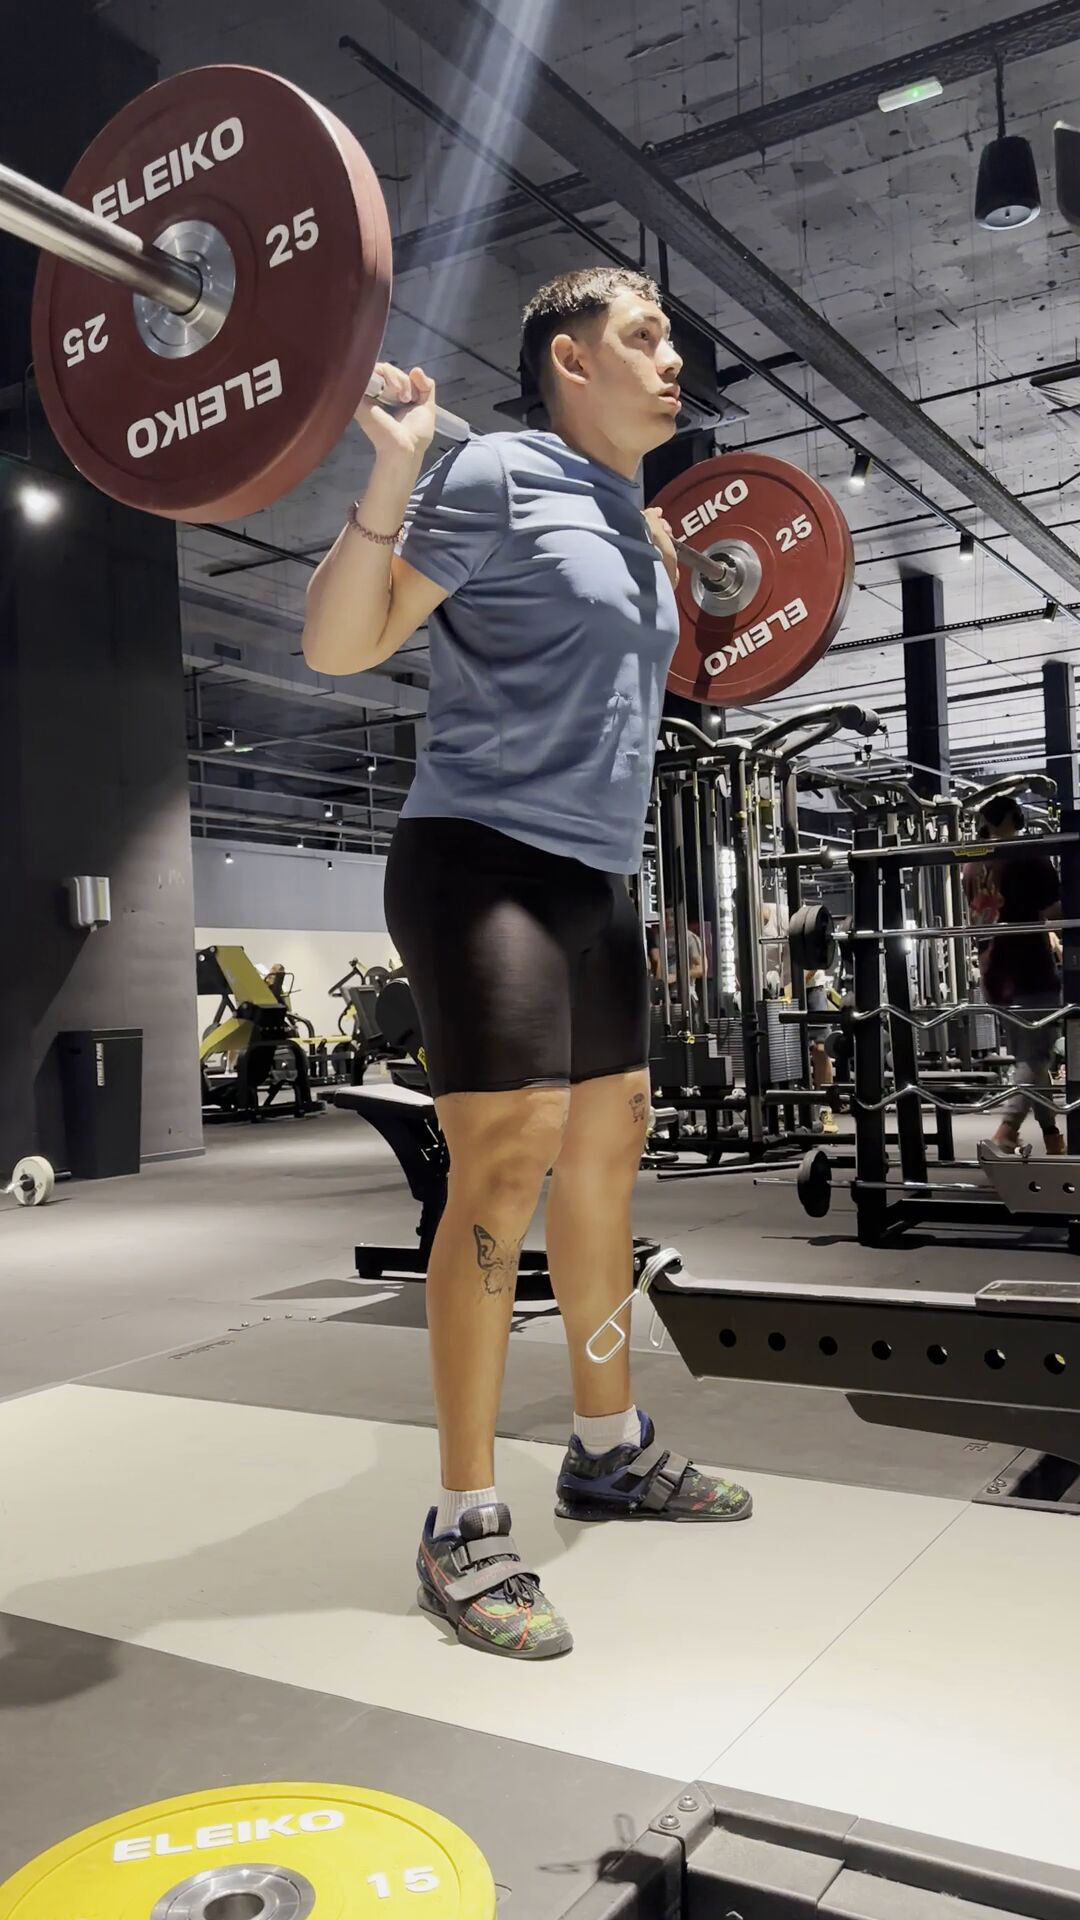

In [167]:
imagen = Image.open('data/dataset_train/IMG_5572(1)_001.jpg')
imagen

In [168]:
annotations_dict['IMG_5572(1)_001.jpg'][0]

array([476.55, 468.17])

In [169]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




def draw_keypoints(image: np.ndarray, keypoints: np.ndarray) -> np.ndarray:
    """Draw keypoints on an image.

    Args:
        image (np.ndarray): input image
        keypoints (np.ndarray): keypoints to draw

    Returns:
        np.ndarray: image with keypoints drawn
    """
    for x, y in keypoints:
        cv2.circle(image, (int(x), int(y)), 2, (0, 255, 0), -1)
    
    # Mostrar la imagen con los puntos
    plt.imshow(image)

# draw_keypoints(imagen, annotations_dict['IMG_5572(1)_001.jpg'])

In [185]:
image = cv2.imread('data/dataset_train/IMG_5572(1)_000.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sc_img, sc_annotations = ffd.image_scaler(image, annotations_dict['IMG_5572(1)_000.jpg'], (224, 224))

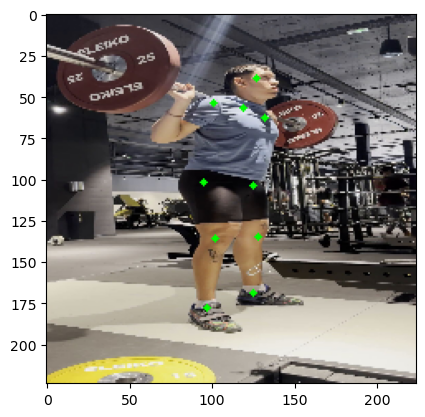

In [186]:
draw_keypoints(sc_img, sc_annotations)

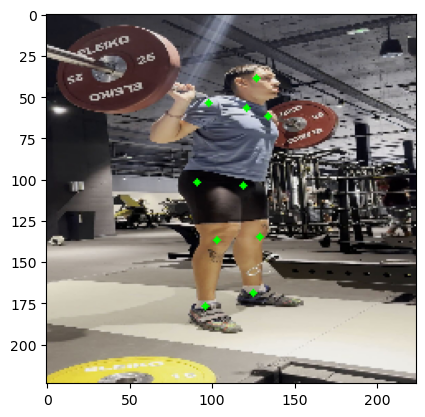

In [182]:
imagen = cv2.imread('data/dataset_train/IMG_5572(1)_001.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
img_size  = imagen.shape[:2]

# Escalar la imagen
scaled_image = cv2.resize(imagen, (224, 224))
sc_img_size = scaled_image.shape[:2]
point_scaler = np.array(
    [
        sc_img_size[1] / img_size[1],
        sc_img_size[0] / img_size[0]
    ]
)

# Escalar los puntos

keypoints = annotations_dict['IMG_5572(1)_001.jpg']

# keypoints_scaled = np.zeros_like(keypoints)

# for i, point in enumerate(keypoints):
#     for j in range(0, len(point)):
#         keypoints_scaled[i, j] = point[j] * point_scaler[j]

keypoints_scaled = keypoints * point_scaler

draw_keypoints(scaled_image, keypoints_scaled)

In [178]:
img_size_scaled = scaled_image.shape[:2]
img_size_scaled

(224, 224)

In [173]:
annotations_dict["IMG_5572(1)_001.jpg"], keypoints

(array([[ 476.55,  468.17],
        [ 649.92,  535.  ],
        [ 616.76,  340.76],
        [ 585.73,  490.66],
        [ 440.74,  882.29],
        [ 578.49,  896.2 ],
        [ 499.28, 1175.13],
        [ 625.09, 1159.94],
        [ 466.57, 1525.05],
        [ 605.63, 1454.16]]),
 array([[ 476.55,  468.17],
        [ 649.92,  535.  ],
        [ 616.76,  340.76],
        [ 585.73,  490.66],
        [ 440.74,  882.29],
        [ 578.49,  896.2 ],
        [ 499.28, 1175.13],
        [ 625.09, 1159.94],
        [ 466.57, 1525.05],
        [ 605.63, 1454.16]]))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=True
)